In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
#Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [6]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [7]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [8]:
# Merge databases on city name
pyber_merge_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])
pyber_merge_df                                                               

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [9]:
pyber_merge_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [10]:
# Get the number of rides for urban cities.  

#Total Rides
ride_count = pyber_merge_df.groupby(["type"]).count()["ride_id"]

# Total Drivers
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]

# Total Fares
fares_total = pyber_merge_df.groupby(["type"]).sum()["fare"]

# Average Fare per Ride
fare_per_ride = fares_total / ride_count

# Average Fare per Driver
fare_driver = fares_total / driver_count

In [11]:
#Assemble data into a data frame

overall_by_city_type_df = pd.DataFrame({
    "Total Rides" : ride_count,
    "Total Drivers" : driver_count,
    "Total Fares" : fares_total,
    "Average Fare per Ride" : fare_per_ride,
    "Average Fare per Driver" : fare_driver
})
overall_by_city_type_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
overall_by_city_type_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [13]:
overall_by_city_type_df.index.name = None
overall_by_city_type_df.head()


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [14]:
overall_by_city_type_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [15]:
#Format Data in DataFrame

overall_by_city_type_df["Total Rides"] = overall_by_city_type_df["Total Rides"].map("{:,}".format)
overall_by_city_type_df["Total Drivers"] = overall_by_city_type_df["Total Drivers"].map("{:,}".format)
overall_by_city_type_df["Total Fares"] = overall_by_city_type_df["Total Fares"].map("${:.2f}".format)
overall_by_city_type_df["Average Fare per Ride"] = overall_by_city_type_df["Average Fare per Ride"].map("${:.2f}".format)
overall_by_city_type_df["Average Fare per Driver"] = overall_by_city_type_df["Average Fare per Driver"].map("${:.2f}".format)

overall_by_city_type_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,"1,625","2,405",$39854.38,$24.53,$16.57


In [16]:
#Rename Columns
pyber_merge_df = pyber_merge_df.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_merge_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [17]:
# Change Index to Date
pyber_merge_df.set_index(["Date"])


,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [18]:
# Create data frame for fares and include only Date, City Type and Fare columns using copy() method on merged data frame.
pyber_copy_df = pyber_merge_df[['Date', 'Fare', 'City Type']].copy()
pyber_copy_df.head()

,Date,Fare,City Type
0,2019-01-14 10:14:22,13.83,Urban
1,2019-03-04 18:24:09,30.24,Urban
2,2019-02-24 04:29:00,33.44,Urban
3,2019-02-10 23:22:03,23.44,Urban
4,2019-03-06 04:28:35,34.58,Urban


In [19]:
#Drop extra date column


In [20]:
#Set index to datetime data type
pyber_copy_df = pyber_copy_df.set_index(["Date"])
# pyber_copy_df = pyber_copy_df['Date'].astype('datetime64[ns]')
pyber_copy_df

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
...,...,...
2019-04-29 17:04:39,13.38,Rural
2019-01-30 00:05:47,20.76,Rural
2019-02-10 21:03:50,11.11,Rural


In [21]:
pyber_copy_df.index = pyber_copy_df.index.astype('datetime64[ns]')

In [22]:
#Check dataframe using info() method to make sure index is set right
pyber_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fare       2375 non-null   float64
 1   City Type  2375 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [23]:
pyber_copy_df.index.dtype

dtype('<M8[ns]')

In [24]:
#Calc sum of fares by city type and date using group by to create a new DataFrame
# Total Fares
sum_fares_total = pyber_copy_df.groupby(["City Type", "Date"]).sum()["Fare"]
sum_fares_total.head()

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
Name: Fare, dtype: float64

In [25]:
pyber_copy_df.groupby('City Type')[['Fare']].mean()

,Fare
City Type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [26]:
# pyber_copy_df('City Type', index='Date', columns='City Type')
pyber_pivot_df = pyber_copy_df.pivot_table(index='Date', columns='City Type')
pyber_pivot_df


Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [27]:
pyber_pivot_df.index.dtype

dtype('<M8[ns]')

In [28]:
new_df = pyber_pivot_df.loc['2019-01-01':'2019-04-28']
resample_by_weeks = new_df.resample('W').sum()
resample_by_weeks

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

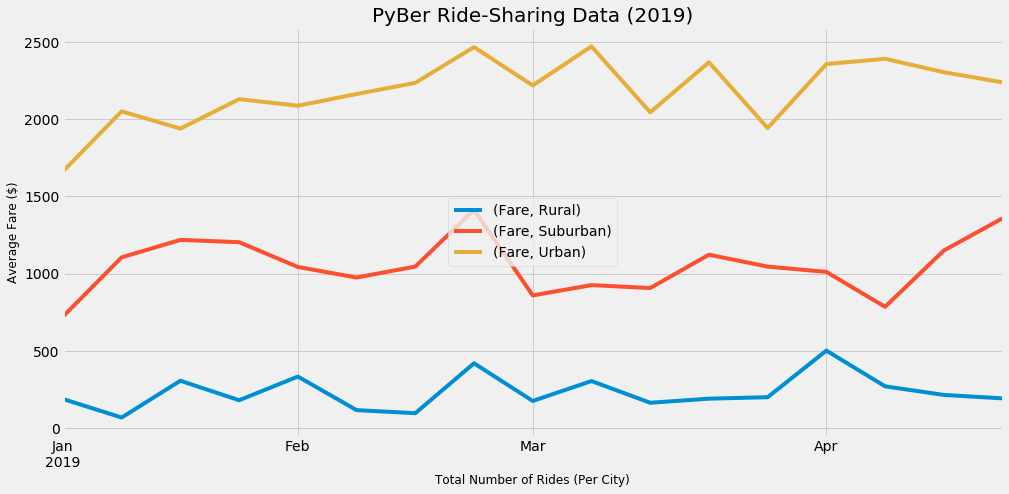

<Figure size 432x288 with 0 Axes>

In [29]:
# create a plot
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
# Build the line charts for each city type.
# plt.subplots(figsize=(10, 6))
fig, ax = plt.subplots(figsize = (15,7))
resample_by_weeks.plot(ax=ax)
ax.set_title("PyBer Ride-Sharing Data (2019)", fontsize=20)
ax.set_ylabel("Average Fare ($)", fontsize=12)
ax.set_xlabel("Total Number of Rides (Per City)", fontsize=12)
ax.legend(loc='center')
ax.grid
plt.show()
plt.savefig("analysis/Fig1a.png")